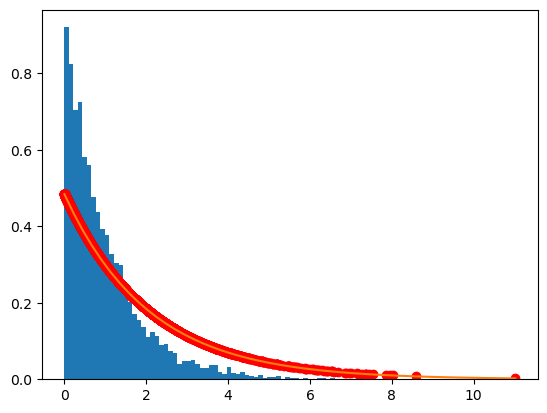

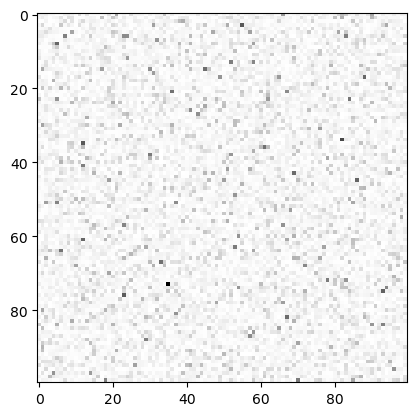

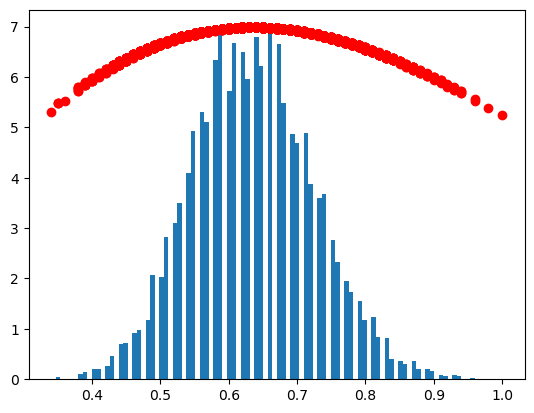

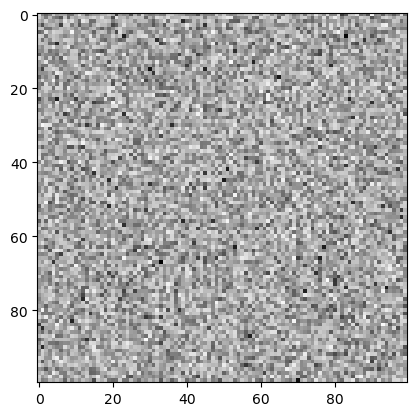

In [331]:
import matplotlib.pyplot as plt  
from sklearn.preprocessing import normalize
import numpy as np
import itertools
from scipy.special import jv

# картинка 100х100

def one_pixel(phase, amplitude, reference):
    
    n = 100

    psi = np.pi/2


    sum_1 = 0
    sum_2 = 0
     
    if reference is True:

        for i in range(100):

            sum_1 += amplitude[i]*np.exp(1j*phase[i]) + 1*np.exp(1j*psi)
            sum_2 += amplitude[i]*np.exp(1j*phase[i]) + 1*np.exp(1j*psi)
        
        


        intensity = (np.array(sum_1)*np.array(sum_2))/n

        return intensity
    
    else:

        
        for i in range(100):
            
            sum_1 += amplitude[i]*np.exp(1j*phase[i]) 
            sum_2 += amplitude[i]*np.exp(1j*phase[i])
            

        


        intensity = (np.array(sum_1)*np.array(sum_2))/n

        return intensity
    
        
    


phi_n = np.random.uniform(-np.pi, np.pi, size=(100, 100, 100))
a_n = np.abs(np.random.normal(0.1, 1, size=(100, 100, 100)))

# a_n = np.divide(a_n, np.amax(a_n))
a_n = np.divide(a_n, 1)
# нормировка




reference = [False, True] 


def matrix_reference(reference, amplitude, phase):
    
    matrix = []

    for i in range(100):
        
        row = []

        for j in range(100):
            row.append(one_pixel(phase=phase[i][j], amplitude=amplitude[i][j], reference=reference))
        
        matrix.append(row)

    return matrix


matrix_false = matrix_reference(reference=False, amplitude=a_n, phase=phi_n)
matrix_false = np.abs(matrix_false)
for_specle_false = matrix_false
# matrix_for_showing_false = matrix_false
matrix_false = list(itertools.chain(*matrix_false))
# matrix_false = np.abs(matrix_false)
matrix_false = [round(num, 5) for num in matrix_false]


matrix_true = matrix_reference(reference=True, amplitude=a_n, phase=phi_n)
matrix_true = np.abs(matrix_true)
for_specle_true = matrix_true
# matrix_for_showing_false = matrix_true
matrix_true = list(itertools.chain(*matrix_true))
matrix_true = [round(num, 2) for num in matrix_true]



# Плотность вероятности больше 1, но площадь под графиком должно быть 1 

k_false = 1/(2*(np.mean(matrix_false))**2)
k_true = 1/(2*(np.mean(matrix_true))**2)

# Гистограмма
plt.hist(matrix_false, bins=100, range=(0, max(matrix_false)), density=True)
#  Аппроксимирующая кривая, хорошо аппроксимирует в конце

values = k_false*np.exp(-1*k_false*np.array(matrix_false))
# log_values = [np.log(x) for x in values]
plt.plot(matrix_false, values, 'ro')
plt.plot(np.linspace(np.min(matrix_false), np.max(matrix_false)), np.array(k_false*np.exp(-1*k_false*np.linspace(np.min(matrix_false), np.max(matrix_false)))))
# plt.ylim([np.min(matrix_false), np.max(matrix_false)])
plt.show()



for_specle_false = np.divide(for_specle_false, np.max(for_specle_false))
plt.imshow(for_specle_false, cmap='Greys')
plt.show()



matrix_reference_wave = np.divide(matrix_true, np.amax(matrix_true))
matrix_reference_wave = [round(num, 2) for num in matrix_reference_wave]
a = plt.hist(matrix_reference_wave, bins=100, range=(min(matrix_reference_wave), max(matrix_reference_wave)), density=True)
values =  2*k_true*np.array(matrix_true)*np.exp((-np.array(matrix_true)**2 + 1)*k_true)*jv(0, np.array(matrix_true)*2*k_true)
values = np.divide(values, np.amax(values))
values = np.array(values)*np.max(a[0])
plt.plot(matrix_reference_wave, values, 'ro')
plt.show()



for_specle_true = np.divide(for_specle_true, np.max(for_specle_true))
plt.imshow(for_specle_true, cmap='Greys')
plt.show()




Прибавили pi/10: 0, раз


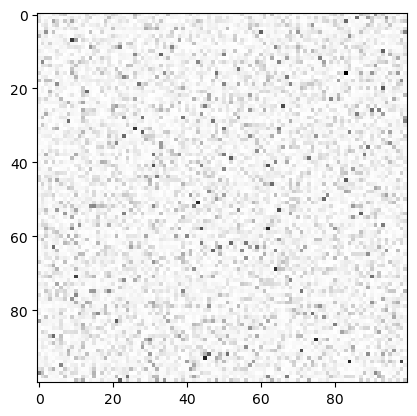

Прибавили pi/10: 1, раз


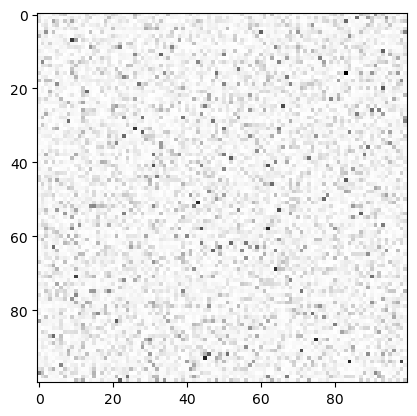

Прибавили pi/10: 2, раз


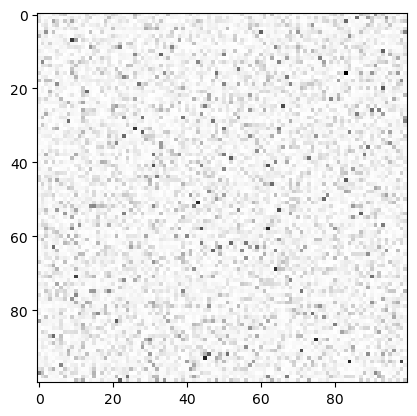

Прибавили pi/10: 3, раз


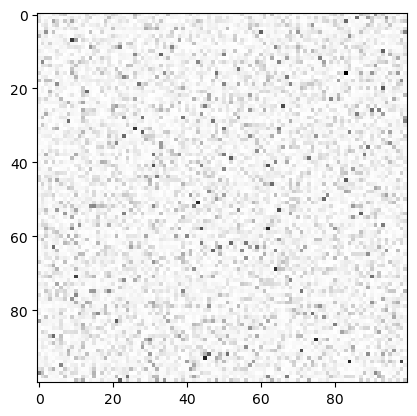

Прибавили pi/10: 4, раз


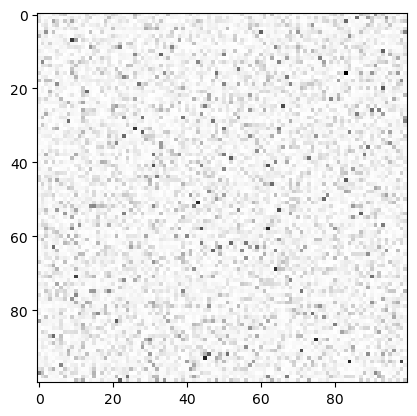

Прибавили pi/10: 5, раз


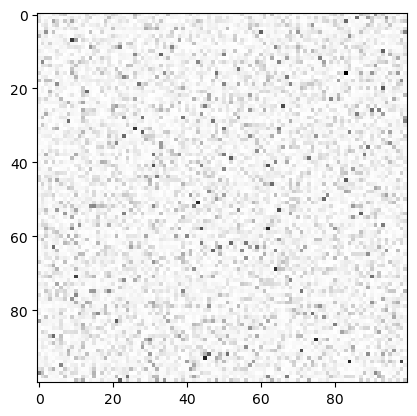

Прибавили pi/10: 6, раз


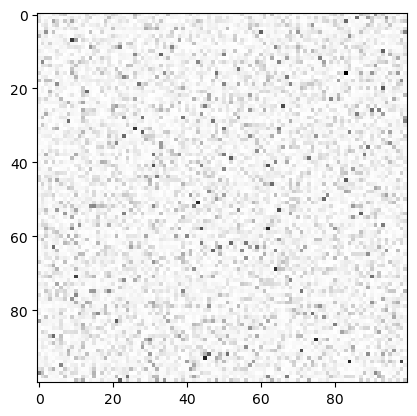

Прибавили pi/10: 7, раз


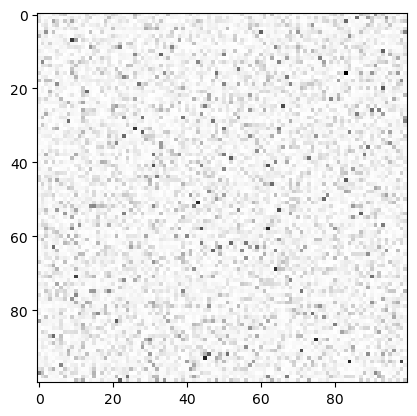

Прибавили pi/10: 8, раз


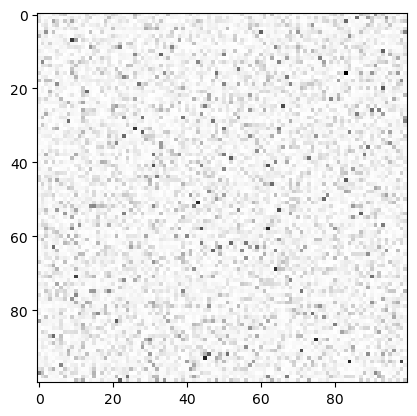

Прибавили pi/10: 9, раз


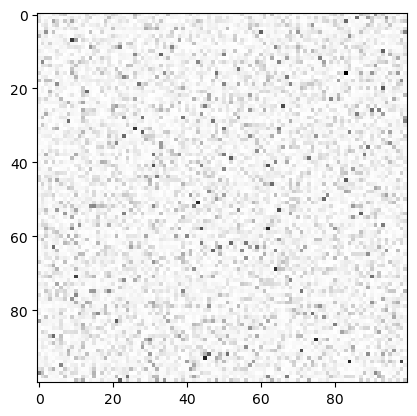

Прибавили pi/10: 10, раз


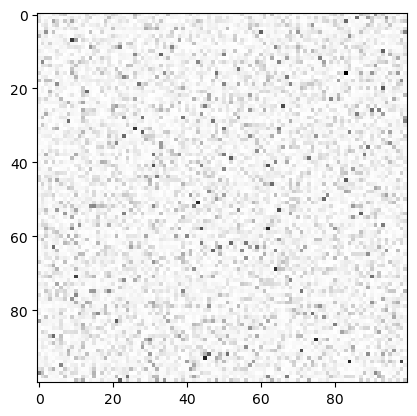

Прибавили pi/10: 11, раз


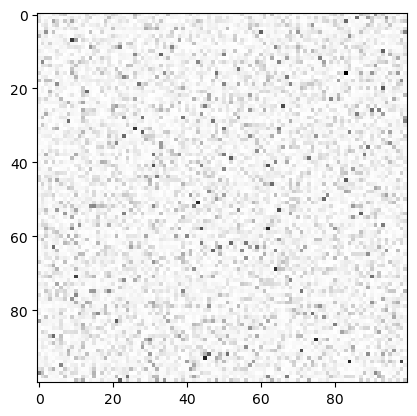

Прибавили pi/10: 12, раз


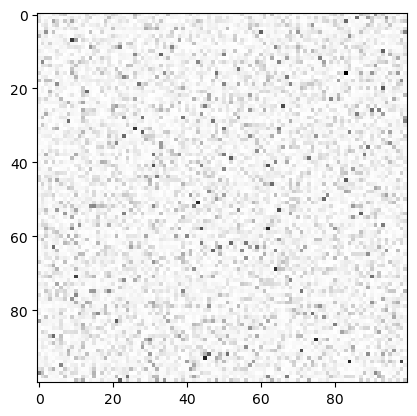

Прибавили pi/10: 13, раз


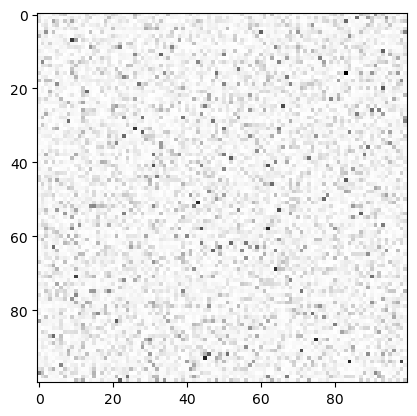

Прибавили pi/10: 14, раз


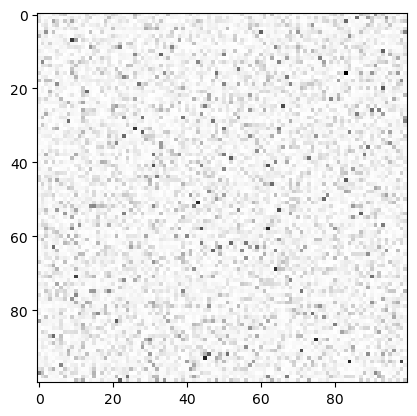

Прибавили pi/10: 15, раз


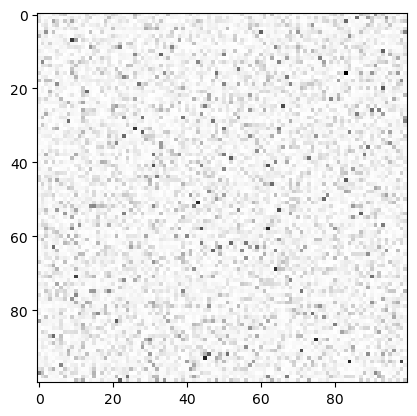

Прибавили pi/10: 16, раз


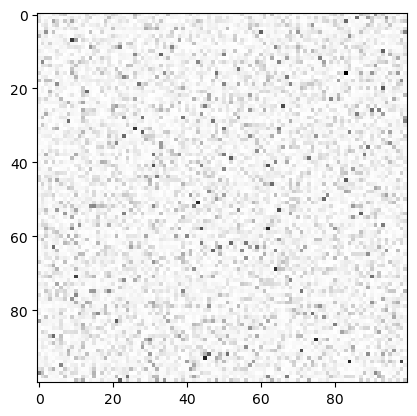

Прибавили pi/10: 17, раз


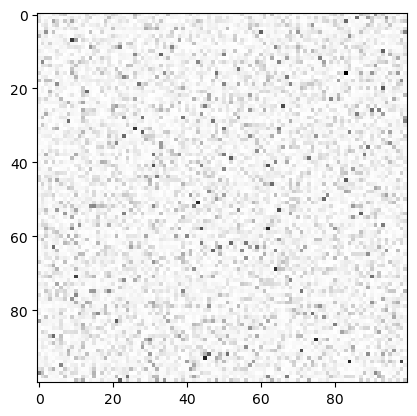

Прибавили pi/10: 18, раз


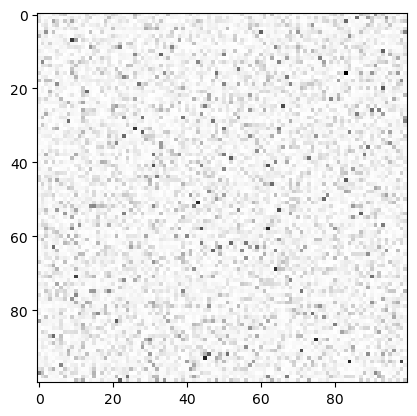

Прибавили pi/10: 19, раз


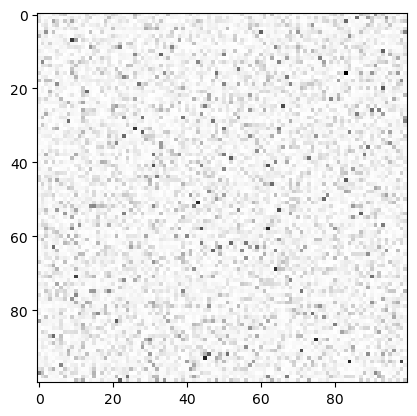

Прибавили pi/10: 20, раз


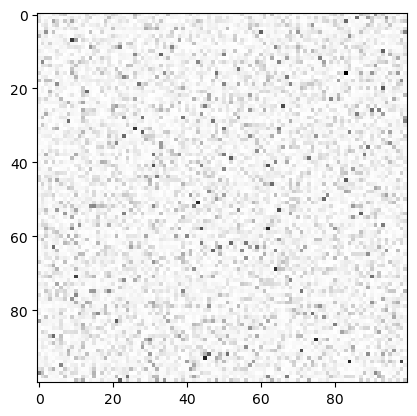

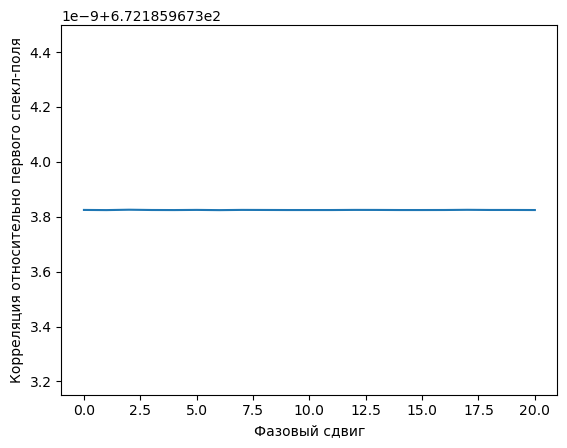

In [271]:
# !phi_n[0] тут ноль потому что список в списке 

specles = []


phi_n = np.random.uniform(-np.pi, np.pi, size=(100, 100, 100))
a_n = np.abs(np.random.normal(0.1, 1, size=(100, 100, 100)))


def specl_image(phi_n, a_n, i):

    matrix_false = matrix_reference(reference=False, amplitude=a_n, phase=i*(np.pi/10) + phi_n)
    matrix_false = np.abs(matrix_false)
    for_specle_false = matrix_false

    for_specle_false = np.divide(for_specle_false, np.max(for_specle_false))
    print(f'Прибавили pi/10: {i}, раз')
    plt.imshow(for_specle_false, cmap='Greys')
    plt.show()

    return for_specle_false

def correlation(phi_n, i):
    
    matrix_false = matrix_reference(reference=False, amplitude=a_n, phase=phi_n)
    matrix_false = np.abs(matrix_false)
    for_specle_false = matrix_false

    specle_0 = np.divide(for_specle_true, np.max(for_specle_true))

    matrix_false = matrix_reference(reference=False, amplitude=a_n, phase=i*(np.pi/10) + phi_n)
    matrix_false = np.abs(matrix_false)
    for_specle_false = matrix_false

    specle_i = np.divide(for_specle_false, np.max(for_specle_false))
    
    r = 0

    for i in range(100):
        for j in range(100):
            r += specle_0[i][j]*specle_i[i][j]

    return r                      



r_indexes = []

for i in range(21):
    specles = specl_image(phi_n, a_n, i)
    r_indexes.append(correlation(phi_n, i))

plt.plot(np.linspace(0, 20, 21), r_indexes)
plt.xlabel('Фазовый сдвиг')
plt.ylabel('Корреляция относительно первого спекл-поля')
plt.show()

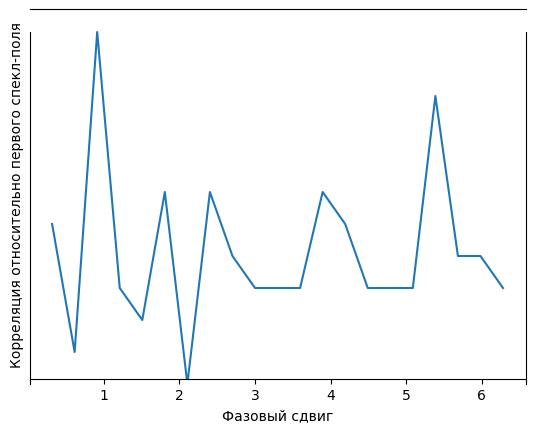

In [272]:
# 5 point
plt.plot(np.linspace(np.pi/10, 2*np.pi, 21), np.array(r_indexes))
plt.xlabel('Фазовый сдвиг')
plt.ylabel('Корреляция относительно первого спекл-поля')
min_value = 2423.6026006736834
max_value = 2423.6026006736884
plt.ylim([np.min(r_indexes), np.max(r_indexes)])

plt.show()